<a href="https://colab.research.google.com/github/heejeongJ/DL_pt/blob/Autoencoder-%234/Autoencoder_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9912422/9912422 [00:00<00:00, 105923489.88it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 74821305.64it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23694296.96it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3787381.46it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



cpu
Epoch [0/10], Loss: 0.0318
Epoch [1/10], Loss: 0.0198
Epoch [2/10], Loss: 0.0148
Epoch [3/10], Loss: 0.0122
Epoch [4/10], Loss: 0.0106
Epoch [5/10], Loss: 0.0093
Epoch [6/10], Loss: 0.0088
Epoch [7/10], Loss: 0.0082
Epoch [8/10], Loss: 0.0078
Epoch [9/10], Loss: 0.0074


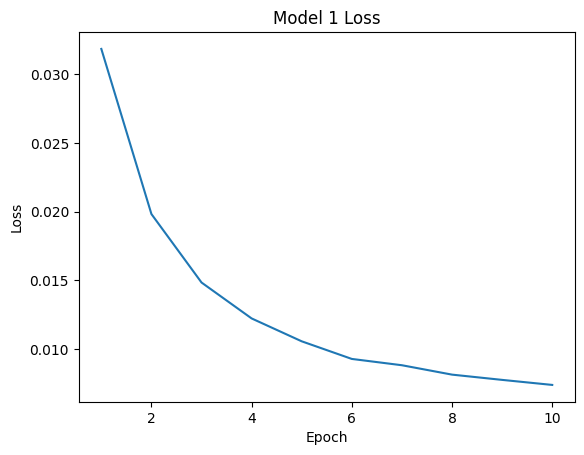

torch.Size([256, 28, 28])


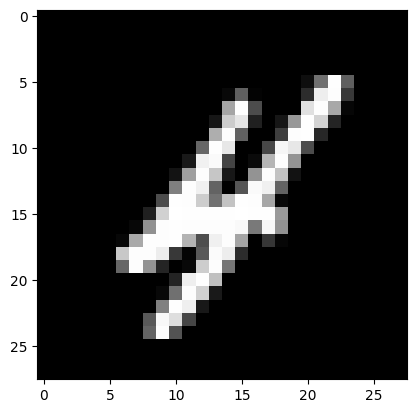

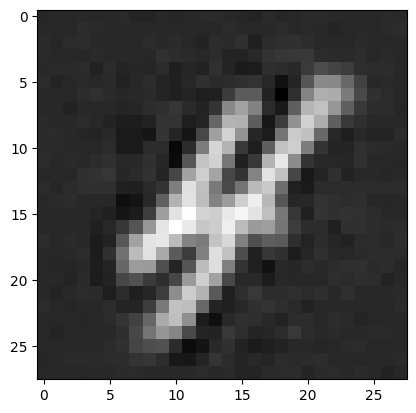

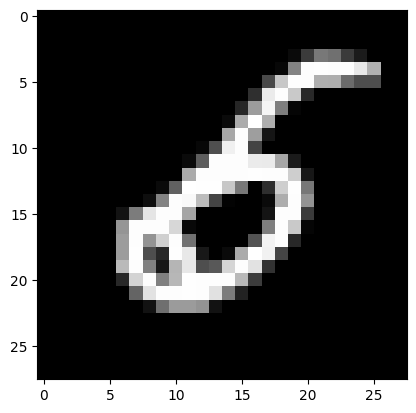

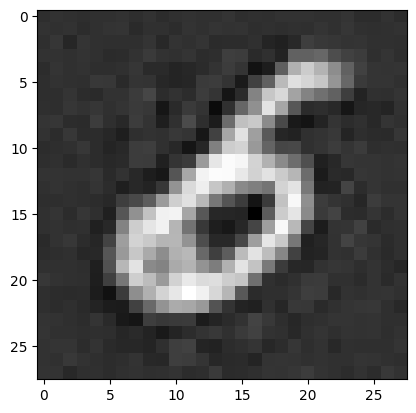

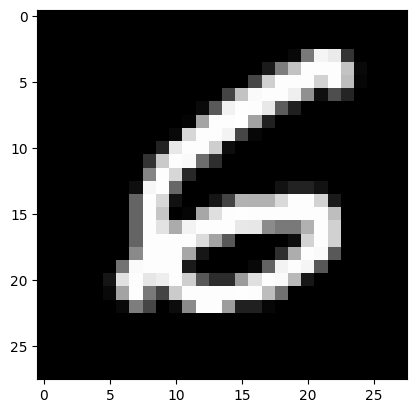

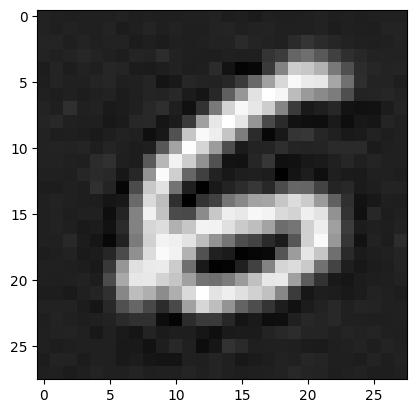

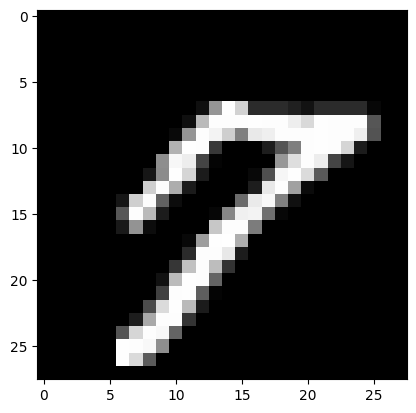

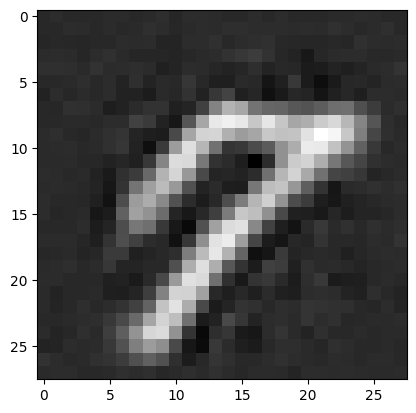

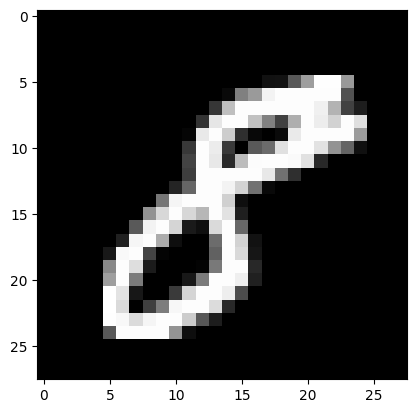

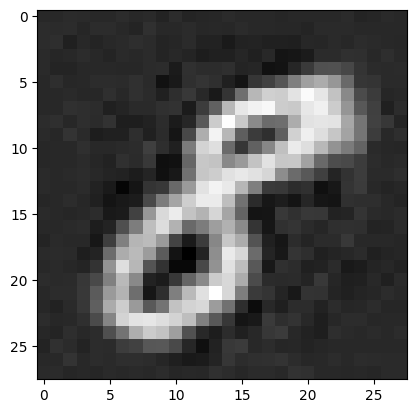

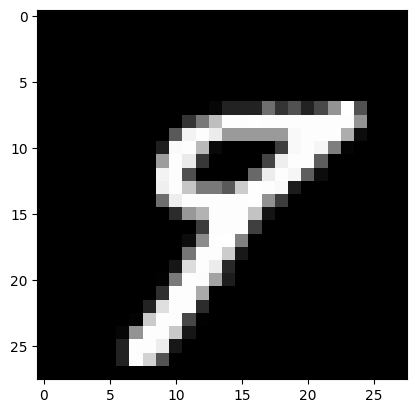

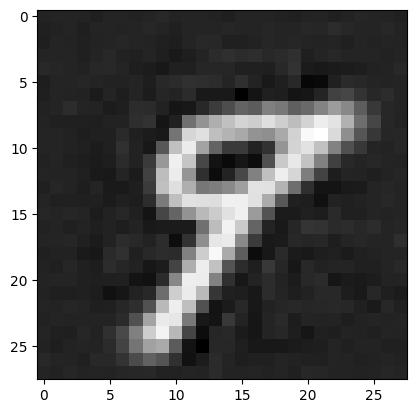

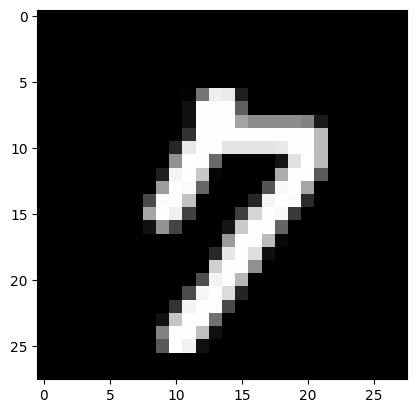

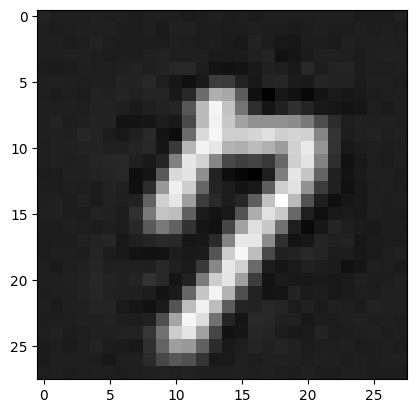

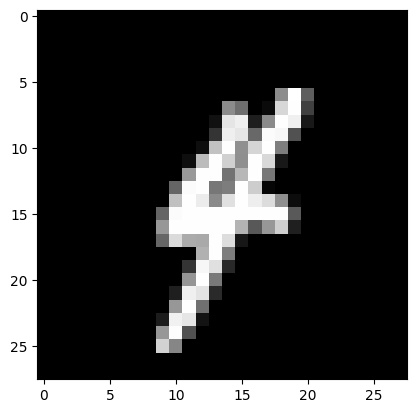

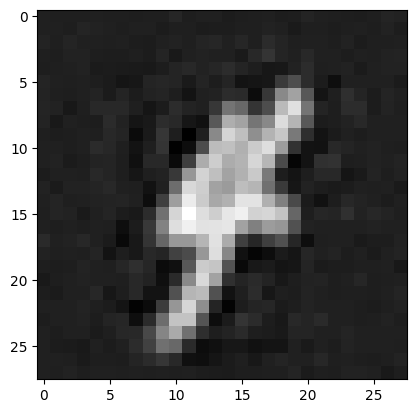

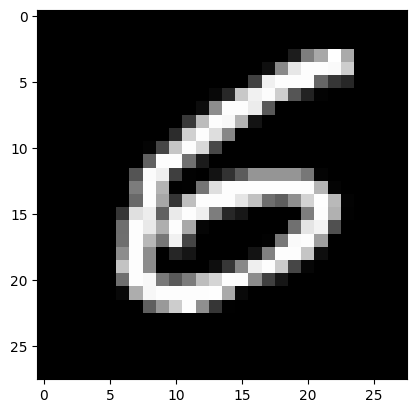

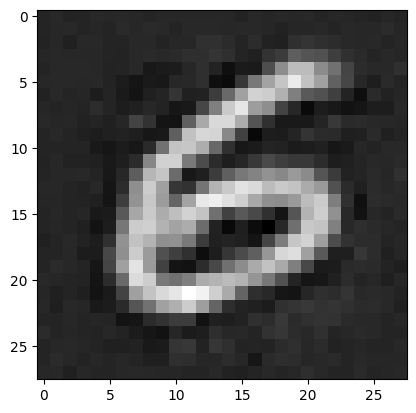

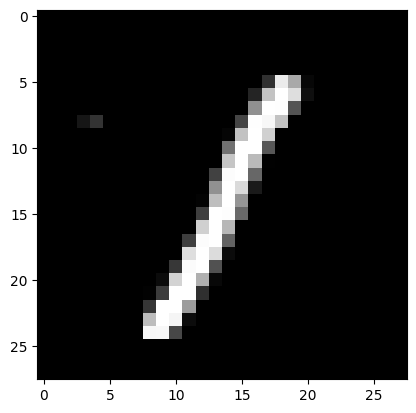

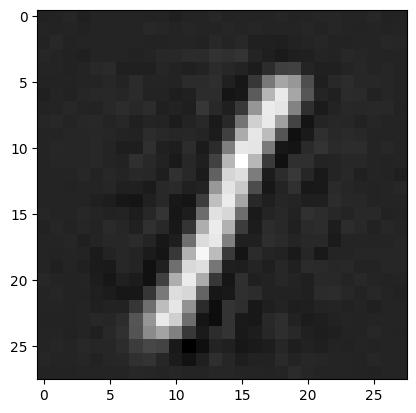

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 하이퍼 파라미터 지정
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

# 데이터 다운로드
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

# DataLoader 설정
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

# 모델 선언
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(28*28, 128)
        self.decoder = nn.Linear(128, 28*28)

    def forward(self, x):
        x = x.view(batch_size, -1)
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(batch_size, 1, 28, 28)
        return out

# 손실 함수, 최적화 함수
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = Autoencoder().to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 학습
losses = []

for epoch in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        # 입력 영상에 노이즈 추가
        noise = init.normal_(torch.FloatTensor(batch_size, 1, 28, 28).to(device), 0, 0.1)
        image = image.to(device)
        image_noisy = image + noise

        optimizer.zero_grad()
        output = model.forward(image_noisy)
        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()

    losses.append(loss.item())
    print(f'Epoch [{epoch}/{num_epoch}], Loss: {loss.item():.4f}')

# Loss 그래프 출력
plt.plot(range(1, num_epoch + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 1 Loss')
plt.show()

# 훈련 영상을 통한 확인
with torch.no_grad():
    for i, [image, label] in enumerate(test_loader):
        x = image.to(device)

        optimizer.zero_grad()
        output = model.forward(x)

    if i % 1000 == 0:
        print(loss)

# 테스트 영상을 통한 확인(최종 결과 확인)
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(10):
    plt.imshow(torch.squeeze(image[i]).numpy(), cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(), cmap='gray')
    plt.show()
